# Pymaceuticals Inc.
---

### Analysis

- According to the bar plot, Capomulin and Ramicone appear to have been the most commonly tested drugs whereas Propriva was the least often used drug in the study.
- A positive correlation has been observed between the tumor volume and the weight of the mouse.
- According to the pie plot, male mice had a 2% higher tumor rate than female mice when comparing 51% male versus 49% female.
- Infobinol is the only drug regimen with an outlier.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data= pd.merge(study_results,mouse_metadata , how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_numbers= complete_data["Mouse ID"].nunique()
mice_numbers

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = complete_data.loc[complete_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_data = complete_data.loc[complete_data["Mouse ID"]==duplicate_data[0]]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= complete_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_numbers = clean_data["Mouse ID"].unique()
num_mice = len(mice_numbers)
num_mice
# the output supposed to be 248 but I don't know why I am getting this number

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_mean= clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
drug_regimen_mean

drug_regimen_median= clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
drug_regimen_median

drug_regimen_variance= clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
drug_regimen_variance

drug_regimen_Std= clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
drug_regimen_Std

drug_regimen_SEM= clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()
drug_regimen_SEM
# Assemble the resulting series into a single summary DataFrame.
Summary_df= pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, "Median Tumor Volume": drug_regimen_median, "Tumor Volume Variance":drug_regimen_variance, "Tumor Volume Std. Dev.":drug_regimen_Std,"Tumor Volume Std. Err.":drug_regimen_SEM})
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg= clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_df_agg   

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

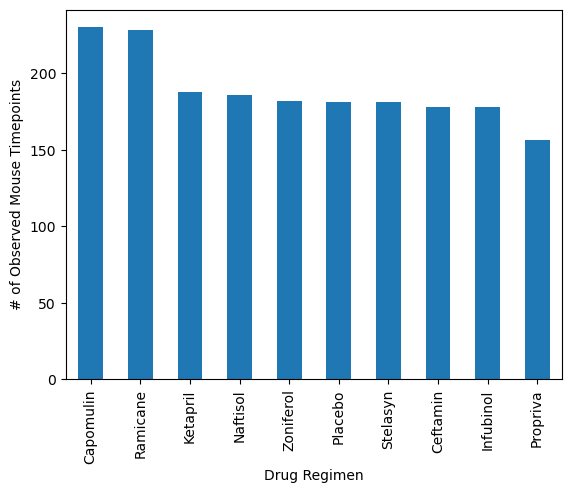

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Total_rows= clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
Total_rows

x_axis=np.arange(len(Total_rows))
pandas_bar_plot= Total_rows.plot.bar(x_axis, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

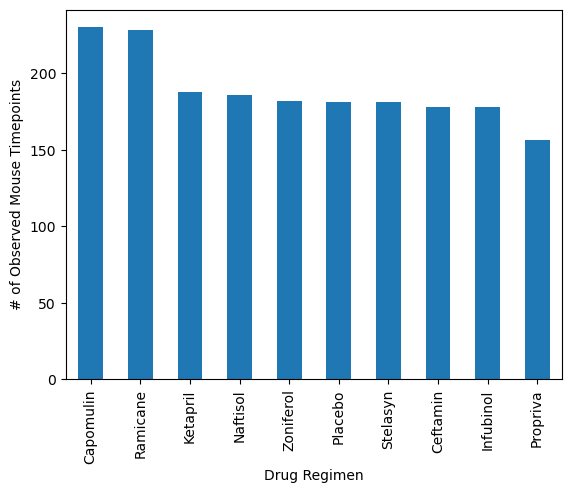

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplt_x_axis = Total_rows.index
pyplt_y_axis = Total_rows.values
py_bar_plot= Total_rows.plot.bar(pyplt_x_axis, pyplt_y_axis, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

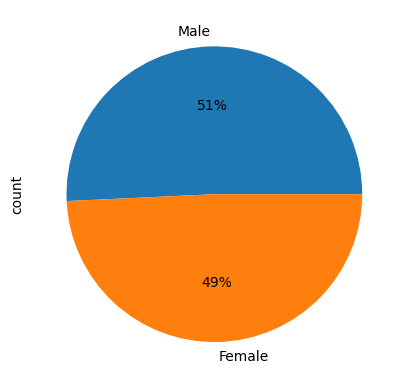

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
unique_mice = clean_data["Sex"].value_counts()
count = ["Male", "Female"]
unique_mice.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "count")
plt.show()

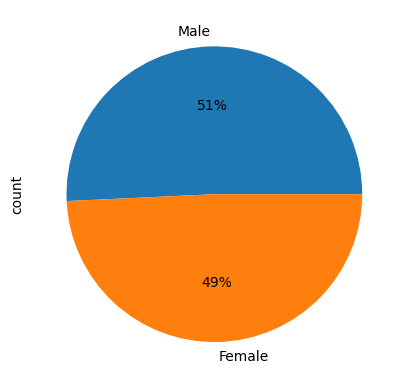

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
female_vs_male = unique_mice.index.values
count_value = unique_mice.values
plt.ylabel("count")
plt.pie(count_value, labels = female_vs_male, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, clean_data, on =('Mouse ID', 'Timepoint'), how = 'left')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
for drug in treatments_list:
    vol = merged_df.loc[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(vol)
    quartiles = vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    

    # Determine outliers using upper and lower bounds
    outlier = vol.loc[(vol < lower_bound) | (vol > upper_bound)]
    print (f"{(drug)}'s potential outlier: {(outlier)}")

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

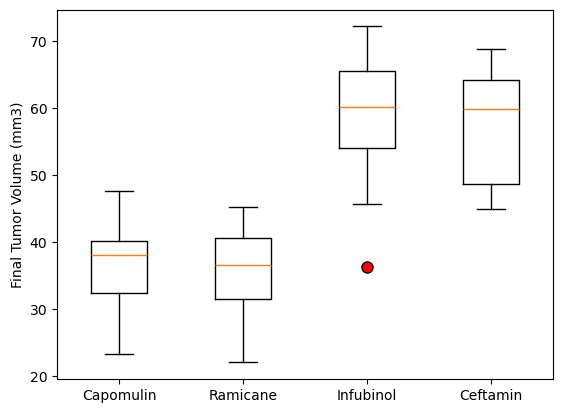

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box_plot = dict(marker = 'o', markerfacecolor = 'r', markersize = 8)
plt.boxplot(tumor_vol_data, flierprops = box_plot)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

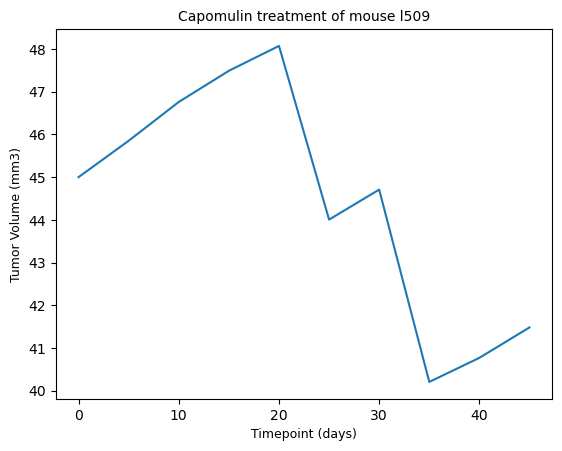

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
reduced_capomulin_df = capomulin_df[["Timepoint", "Tumor Volume (mm3)"]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])
timepoint = reduced_capomulin_df.index.values
tumor_volume = reduced_capomulin_df.values
plt.plot(timepoint, tumor_volume)

plt.title("Capomulin treatment of mouse l509", fontsize = 10)
plt.xlabel("Timepoint (days)", fontsize = 9)
plt.ylabel("Tumor Volume (mm3)", fontsize = 9)
plt.show

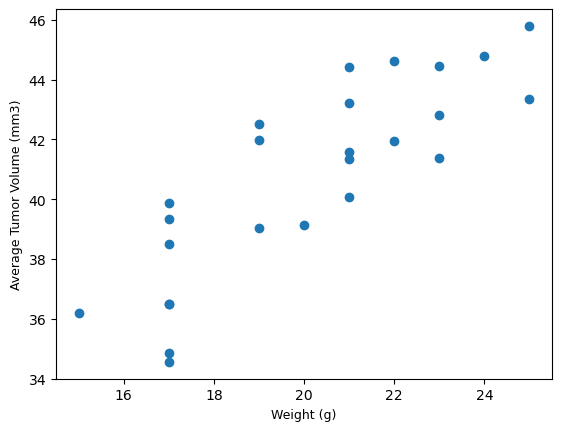

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_regimen = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
group_capo_df = capo_regimen.groupby("Mouse ID")
average_vol = group_capo_df[("Tumor Volume (mm3)")].mean()
weight = group_capo_df["Weight (g)"].mean()
avg_capo_df = pd.DataFrame({"Weight (g)" :weight, "Tumor Volume (mm3)": average_vol})

plt.scatter(weight, average_vol)

plt.xlabel("Weight (g)", fontsize = 9)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 9)
plt.show()

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is 0.84


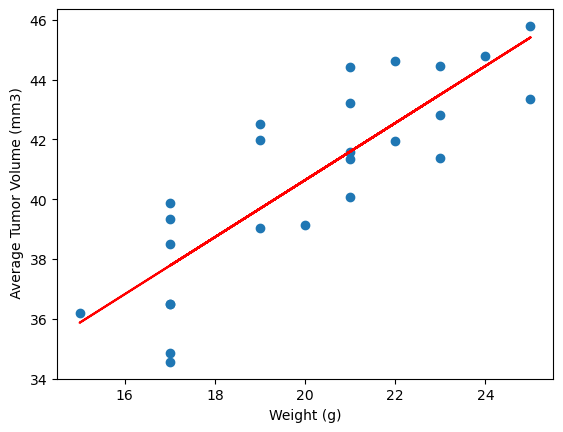

In [27]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight, average_vol)
print(f" The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avg_capo_df["Weight (g)"]
y_values = avg_capo_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_vol)
regress_values = x_values * slope + intercept
line_eq = "y ="+str(round(slope, 2)) + "x + " + str (round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel(" Average Tumor Volume (mm3)")
plt.show()

                                                